# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "Dataset_traffic_signs/train.p"
validation_file="Dataset_traffic_signs/valid.p"
testing_file = "Dataset_traffic_signs/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
#all numpy arrays  
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(len(X_test))

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
12630


In [2]:
print(type(X_train))
print(type(X_valid))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#maybe use: sklearn.model_selection.train_test_split
#Number of training examples
#take 80
n_train = len(X_train)

#Number of validation examples
n_validation = len(X_valid)

#Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32,32,3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

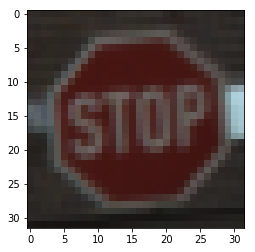

    ClassId SignName
14       14     Stop


In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas as pd
# load the sing name csv as a Panda dataframe
df = pd.read_csv('signnames.csv')
#print(df.columns.values)
# Visualizations will be shown in the notebook.
%matplotlib inline

#chose a random image to plot 
image_index = random.choice(range(n_train))
#plot the image
plt.imshow(X_train[image_index])
plt.show()
#check the value of the label and it's corresponding meaning
image_label = y_train[image_index]
#print(df['SignName'].loc[image_label])
print(df.loc[df['ClassId'] == image_label])


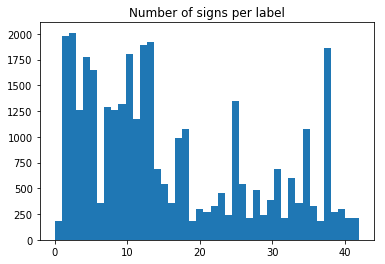

2010
809.0


In [5]:
#plot the histogram of all the classes
plt.hist(y_train, bins=n_classes)
plt.title("Number of signs per label")
plt.show()

# what is the average number of samples per class?
hist = np.histogram(y_train, bins = n_classes, range = [0,42])

hist_average = np.average(hist[0])
hist_max = np.max(hist[0])
print(hist_max)
print(np.around(hist_average,decimals = 0))

Show how the image rotation works    

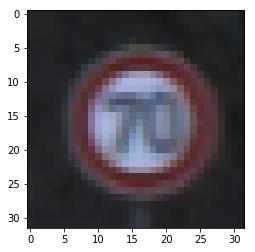

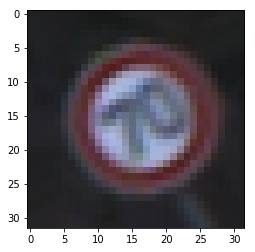

In [6]:
import scipy.ndimage
import scipy.misc
%matplotlib inline
#chose a random image to plot 
image_index = random.choice(range(n_train))
#rotate the image and keep the same format [32,32,3]
r_img = scipy.ndimage.interpolation.rotate(X_train[image_index], 30, reshape = False, mode = 'nearest')

###plot the images
#plot the image in the database
plt.imshow(X_train[image_index])
plt.show()
#plot the rotated image
plt.imshow(r_img)
plt.show()

Now use a random rotation angle and for each label that has less than the average images per label, add a rotated image until we reach the average

In [7]:
### only run this cell the first time the project is run
### it creates a bigger dataset of training images by using existing labeled images and rotating them randomly

'''
for label in range(n_classes):
    print('number of images in this category: ',hist[0][label])
    if hist[0][label]<hist_average:
        #check how many images are missing
        missing_images = int(hist_average-hist[0][label])
        print('number of missing images',missing_images)
        while(missing_images>=0):
            #find the indexes of all the images having this label
            same_label_index=[i for i, x in enumerate(y_train) if x==label]
            #randomly grab an index in the list 
            image_index = same_label_index[random.choice(range(len(same_label_index)))]
            img_to_be_rotated = X_train[image_index]
            #grab the label of this image
            img_label = y_train[image_index]
            #randomly grab a rotation value
            rotation_angle = np.round(random.uniform(-30.0,30.0), decimals=1)
            #rotate the image
            rotated_img = scipy.ndimage.interpolation.rotate(img_to_be_rotated, rotation_angle, reshape = False, mode = 'nearest')
            #reshape the image to add it to the database
            rotated_img = np.reshape(rotated_img, (1,32,32,3))
            #add the image to the database
            X_train = np.concatenate((X_train, rotated_img))
            y_train = np.append(y_train, img_label)
            # don't forget to change the missing_image value
            missing_images-=1

# plot the histogram of the new dataset
plt.hist(y_train, bins=n_classes)
plt.title("Number of signs per label")
plt.show()

# save as a new file
new_training_file = "Dataset_traffic_signs/train_new.p"
new_train_dict = {'features': X_train , 'labels': y_train}
with open(new_training_file, mode='wb') as f:
    pickle.dump(new_train_dict, f) 
'''

'\nfor label in range(n_classes):\n    print(\'number of images in this category: \',hist[0][label])\n    if hist[0][label]<hist_average:\n        #check how many images are missing\n        missing_images = int(hist_average-hist[0][label])\n        print(\'number of missing images\',missing_images)\n        while(missing_images>=0):\n            #find the indexes of all the images having this label\n            same_label_index=[i for i, x in enumerate(y_train) if x==label]\n            #randomly grab an index in the list \n            image_index = same_label_index[random.choice(range(len(same_label_index)))]\n            img_to_be_rotated = X_train[image_index]\n            #grab the label of this image\n            img_label = y_train[image_index]\n            #randomly grab a rotation value\n            rotation_angle = np.round(random.uniform(-30.0,30.0), decimals=1)\n            #rotate the image\n            rotated_img = scipy.ndimage.interpolation.rotate(img_to_be_rotated, ro

In [8]:
# if the previous cell has already been run, jump to this one to retrieve the data
new_training_file = "Dataset_traffic_signs/train_new.p"
with open(new_training_file, mode='rb') as f:
    test = pickle.load(f)
#all numpy arrays  
X_train, y_train = test['features'], test['labels']
n_train = len(X_train)

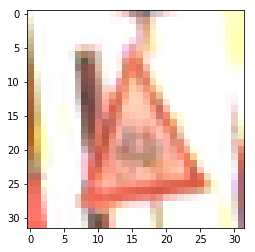

    ClassId           SignName
29       29  Bicycles crossing


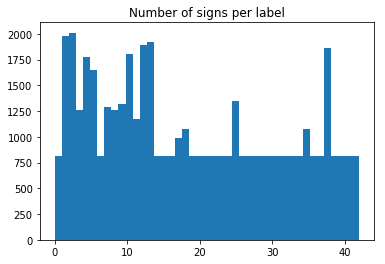

In [9]:
#chose a random image to plot 
image_index = random.choice(range(n_train))
#plot the image
plt.imshow(X_train[image_index])
plt.show()
#check the value of the label and it's corresponding meaning
image_label = y_train[image_index]
#print(df['SignName'].loc[image_label])
print(df.loc[df['ClassId'] == image_label])

#plot the histogram of all the classes
plt.hist(y_train, bins=n_classes)
plt.title("Number of signs per label")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(46740, 32, 32, 3)
(46740, 32, 32, 3)
Normalized dataset:
mean =  -0.347
standard deviation =  0.527
(46740, 32, 32, 3)


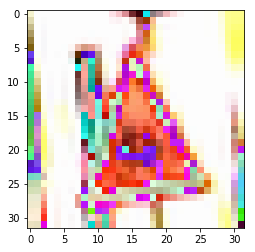

In [10]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

#normalize the data
def normalize_grey_IMGdataset(X):
    total_images = X.shape[0]
    X = X.astype(np.float_)
    X = np.divide((X-128),128)
    return X

print(X_train.shape)
X_train = normalize_grey_IMGdataset(X_train)
X_valid = normalize_grey_IMGdataset(X_valid)
X_test = normalize_grey_IMGdataset(X_test)

print(X_train.shape)

#make sure the image is still OK
plt.imshow(X_train[image_index], cmap = 'gray')
# compare the mean and std of the untouched and the new dataset
print('Normalized dataset:')
print('mean = ',np.around(np.mean(X_train),decimals = 3))
print('standard deviation = ',np.around(np.std(X_train),decimals = 3))
print(X_train.shape)

### Model Architecture

Let's start with a LeNet architecture where we have :
- convolution layer 1
- activation layer 1
- pooling 1
- convolution layer 2
- activation layer 2
- pooling 2
- convolution layer 3
- activation layer 3
- pooling 3
- fully connected layer 4
- fully connected layer 5

![LeNet Architecture](lenet.png)

In [11]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    filter1_shape = [5,5,3,6]
    F1 = tf.Variable(tf.random_normal(filter1_shape, mean = mu, stddev = sigma))
    b1 = tf.Variable(tf.zeros(6))
    strides1 = [1,1,1,1]
    padding1 = 'VALID'
    layer1_out = tf.nn.conv2d(x,F1,strides1,padding1) + b1
    #print('layer1 shape = ', tf.shape(layer1_out))
    # TODO: Activation.
    activation1_out = tf.sigmoid(layer1_out)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    window_pool = [1, 2, 2, 1]
    stride_pool = [1, 2, 2, 1]
    padding_pool = 'VALID'
    pool1_out = tf.nn.max_pool(activation1_out, window_pool, stride_pool, padding_pool)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filter2_shape = [5,5,6,16]
    F2 = tf.Variable(tf.random_normal(filter2_shape, mean = mu, stddev = sigma))
    b2 = tf.Variable(tf.zeros(16))
    strides2 = [1,1,1,1]
    padding2 = 'VALID'
    layer2_out = tf.nn.conv2d(pool1_out,F2,strides2,padding2) + b2
    #print('layer2 shape = ', tf.shape(layer2_out))
    # TODO: Activation.
    activation2_out = tf.nn.relu(layer2_out)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    window_pool2 = [1, 2, 2, 1]
    stride_pool2 = [1, 2, 2, 1]
    pool2_out = tf.nn.max_pool(activation2_out, window_pool2, stride_pool2, padding_pool)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flatten_out = tf.contrib.layers.flatten(pool2_out)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.random_normal(shape=(400, 120),mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))
    layer3_out = tf.add(tf.matmul(flatten_out,W3), b3)
    # TODO: Activation.
    activation3_out = tf.sigmoid(layer3_out)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.random_normal(shape = [120,84],mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84))
    layer4_out = tf.matmul(activation3_out,W4)+ b4
    # TODO: Activation.
    activation4_out = tf.sigmoid(layer4_out)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.random_normal(shape = [84,43]))
    b5 = tf.Variable(tf.zeros(43))
    layer4_out = tf.add(tf.matmul(activation4_out,W5), b5)
    logits = layer4_out
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
#create the tensor for the the one_hot labels
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Prepare what is needed to train the model

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Prepare what will be used to check the accuracy of the model

In [16]:
# argmax returns the index with the largest value across axes of a tensor.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #make sure to re-shuffle the data each time
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        print('computing validation accuracy')    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    #test_accuracy = evaluate(X_test, y_test)
    #print("Accuracy for test images = {:.3f}".format(test_accuracy))
    
    saver.save(sess, 'lenet_augm_rgb')
    print("Model saved")

Training...

computing validation accuracy
EPOCH 1 ...
Validation Accuracy = 0.473

computing validation accuracy
EPOCH 2 ...
Validation Accuracy = 0.737

computing validation accuracy
EPOCH 3 ...
Validation Accuracy = 0.809

computing validation accuracy
EPOCH 4 ...
Validation Accuracy = 0.845

computing validation accuracy
EPOCH 5 ...
Validation Accuracy = 0.863

computing validation accuracy
EPOCH 6 ...
Validation Accuracy = 0.889

computing validation accuracy
EPOCH 7 ...
Validation Accuracy = 0.895

computing validation accuracy
EPOCH 8 ...
Validation Accuracy = 0.907

computing validation accuracy
EPOCH 9 ...
Validation Accuracy = 0.905

computing validation accuracy
EPOCH 10 ...
Validation Accuracy = 0.911

Model saved


In [18]:
with tf.Session() as sess:
    saver.restore(sess, './lenet_augm')
    print("Model restored.")
    #sess.run(tf.global_variables_initializer())
    test_accuracy = evaluate(X_test, y_test)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [5,5,3,6] rhs shape= [5,5,1,6]
	 [[Node: save/Assign = Assign[T=DT_FLOAT, _class=["loc:@Variable"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable, save/RestoreV2)]]

Caused by op 'save/Assign', defined at:
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-6d900d6ff6be>", line 4, in <module>
    saver = tf.train.Saver()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 373, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 130, in restore
    self.op.get_shape().is_fully_defined())
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_state_ops.py", line 47, in assign
    use_locking=use_locking, name=name)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [5,5,3,6] rhs shape= [5,5,1,6]
	 [[Node: save/Assign = Assign[T=DT_FLOAT, _class=["loc:@Variable"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable, save/RestoreV2)]]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

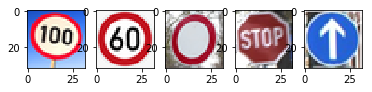

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
img_list_str = ["img1.png", "img2.png","img3.png","img4.png","img5.png"]
img_list = []
import matplotlib.image as mpimg

for i in range(len(img_list_str)):
    img = img_list_str[i]
    mg=mpimg.imread(img)
    img_list.append(mg)
    #plot the image
    plt.subplot(1, 5, i+1)
    plt.imshow(mg)
plt.show()

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

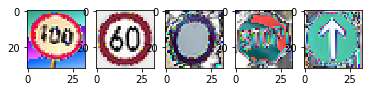

(5, 32, 32, 3)
<class 'numpy.ndarray'>
Normalized dataset:
mean =  0.23
standard deviation =  0.626


In [15]:
#normalize the image

#the data is loaded as a float from 0 to 1
#we need to convert it to 0 to 255
img_list_norm = []

for img in img_list:
    img_norm = (img*255 -128)/128
    img_list_norm.append(img_norm)

#make sure the images are still OK
for i in range(len(img_list_norm)):
    img = img_list_norm[i]
    #plot the image
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
plt.show()
#transform the list into an array
img_list_norm = np.array(img_list_norm)
print(img_list_norm.shape)
print(type(img_list_norm))

print('Normalized dataset:')
print('mean = ',np.around(np.mean(img_list_norm),decimals = 3))
print('standard deviation = ',np.around(np.std(img_list_norm),decimals = 3))

In [16]:
#create the label
y_ = [7,3,15,14,35]
y_ =  np.array(y_)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [17]:
with tf.Session() as sess:
    #restore the model 
    saver.restore(sess, './lenet')
    print("Model restored.")

    #load an image
    #x_try = tf.placeholder(tf.float32, (None, 32, 32, 3))
    #y_try = tf.placeholder(tf.int32, (None))
    #create the tensor for the the one_hot labels
    #one_hot_y = tf.one_hot(y_, 43)
    # print(one_hot_y)
    #logits = LeNet(x)
    #correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    evaluate_5 = evaluate(img_list_norm, y_)
    #print(sess.run(evaluate_5))
    print(evaluate_5)

Model restored.
0.600000023842


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")